In [3]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('cleaned_data.csv')
age_summary = df.groupby('Age_in_years')[['Body_length', 'Weight']].mean().reset_index()

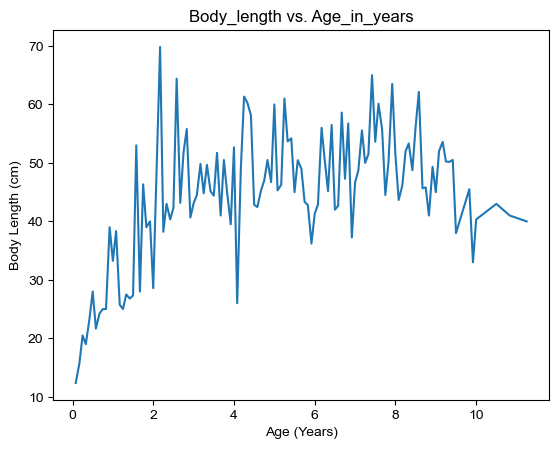

In [5]:
sns.lineplot(data=age_summary, x='Age_in_years', y='Body_length')
sns.set_theme(style='ticks')

plt.title('Body_length vs. Age_in_years')
plt.xlabel('Age (Years)')
plt.ylabel('Body Length (cm)')

plt.show() 

# My problem here is that there is a lot of noise with the current graph, I'm to try and simplify it without sacraficing the accuracy.

In [6]:
age_summary['Body_length_smooth'] = age_summary['Body_length'].rolling(window=3, center=True).mean()

# .rolling() creates a rolling windwo over my data.
# window=3 means the window size is 3 data points
# center=True means the window is centered on each data point rather than ending it.

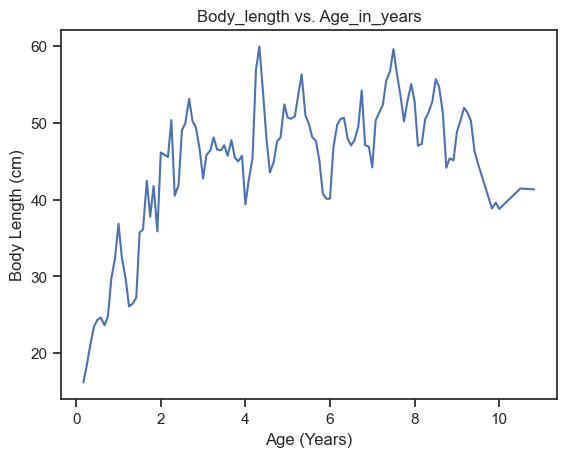

In [7]:
# Age vs. Body Length
sns.lineplot(data=age_summary, x='Age_in_years', y='Body_length_smooth')
sns.set_theme(style='ticks')

plt.title('Body_length vs. Age_in_years')
plt.xlabel('Age (Years)')
plt.ylabel('Body Length (cm)')

plt.show() 

In [11]:
import numpy as np


In [12]:
clean_data = age_summary[['Age_in_years', 'Body_length_smooth']].replace([np.inf, -np.inf], np.nan).dropna()

In [13]:
# Statistical Test to see if the relationship is significant

from scipy.stats import pearsonr

# Replace with your actual column names
x = clean_data['Age_in_years']
y = clean_data['Body_length_smooth']

# Perform Pearson correlation test
r_value, p_value = pearsonr(x, y)

# Print results
print(f"Correlation coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value > 0.05:
    print("No statistically significant correlation (fail to reject H0)")
else:
    print("Statistically significant correlation (reject H0)")


Correlation coefficient (r): 0.599
P-value: 0.000
Statistically significant correlation (reject H0)


# This result means that the relationship between age and body leangth is the hypothesis of age having a moderately postiive correlation with body length is statistically significant. As age increases so does body length.